In [1]:
import pandas as pd
import numpy as np 
 
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [2]:
mydata=pd.read_csv("C:/Users/Welcome/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
mydata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
mydata.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5


In [6]:
mydata.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [7]:
mydata.shape

(7043, 20)

In [8]:
mydata['customerID']=pd.to_numeric('customerID',errors='coerce')
mydata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,NaN,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,NaN,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,NaN,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,NaN,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,NaN,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [9]:
clusterdata=mydata.drop('customerID',axis=1)

In [43]:
clusterdata

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.5
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,1990.5
7039,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,7362.9
7040,1,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,346.45
7041,0,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,306.6


In [ ]:
clusterdata['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)


In [46]:
clusterdata['TotalCharges'] = pd.to_numeric(clusterdata['TotalCharges'], errors = 'coerce')


In [11]:
mydata

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,NaN,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,NaN,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,NaN,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,NaN,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,NaN,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,NaN,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
7039,NaN,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
7040,NaN,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,NaN,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6


In [9]:
mydata.iloc[:3]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


In [32]:
clusterdata['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [34]:
clusterdata['Dependents'].replace(['Yes','No'],[1,0],inplace=True)

In [16]:
clusterdata['Partner'].replace(['No','Yes'],[0,1],inplace=True)


In [23]:
clusterdata['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)

In [24]:
clusterdata['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [25]:
clusterdata['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [53]:
clusterdata['TotalCharges'] = pd.to_numeric(clusterdata['TotalCharges'], errors = 'coerce')

clusterdata.loc[clusterdata['TotalCharges'].isna()==True]
clusterdata.drop(['TotalCharges'],axis =1,inplace=True)

In [30]:
clusterdata['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)

In [40]:
clusterdata['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)


In [38]:
clusterdata['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)


In [36]:
clusterdata['gender'].replace(['Male','Female'],[0,1],inplace=True)


In [21]:
clusterdata['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)


In [18]:
clusterdata['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)

In [54]:
from scipy.spatial.distance import cdist
clusters=range(1,15)
meandist=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clusterdata)
    clusassign=model.predict(clusterdata)
    meandist.append(sum(np.min(cdist(clusterdata, model.cluster_centers_, 'euclidean'), axis=1))/ clusterdata.shape[0])

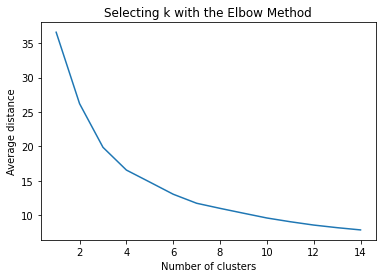

In [56]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [58]:
est = KMeans(4)  
part=est.fit(clusterdata)
cluster=est.predict(clusterdata)

In [59]:
clusterdata['cluster']=cluster

In [60]:
clusterdata['cluster'].value_counts()

0    2186
3    1959
2    1745
1    1153
Name: cluster, dtype: int64

In [61]:
clusterdata

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,cluster
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,2
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,2
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,0
7039,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,3
7040,1,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,2
7041,0,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,0


In [63]:
list(zip(clusterdata['gender'].values,clusterdata['cluster'].values))

[(1, 2),
 (0, 1),
 (0, 2),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 0),
 (1, 2),
 (1, 0),
 (0, 1),
 (0, 2),
 (0, 2),
 (0, 3),
 (0, 3),
 (0, 0),
 (1, 3),
 (1, 1),
 (0, 3),
 (1, 2),
 (1, 0),
 (0, 2),
 (0, 2),
 (0, 2),
 (1, 1),
 (0, 1),
 (1, 2),
 (0, 3),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 3),
 (0, 0),
 (1, 0),
 (0, 2),
 (0, 2),
 (1, 3),
 (0, 0),
 (1, 3),
 (0, 3),
 (1, 0),
 (0, 2),
 (1, 3),
 (1, 2),
 (1, 3),
 (1, 0),
 (1, 3),
 (0, 2),
 (1, 0),
 (0, 3),
 (1, 3),
 (1, 3),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 3),
 (0, 0),
 (1, 3),
 (0, 3),
 (1, 1),
 (1, 3),
 (1, 3),
 (0, 3),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 3),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 2),
 (1, 1),
 (0, 3),
 (0, 1),
 (1, 0),
 (1, 3),
 (1, 1),
 (1, 2),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 2),
 (1, 0),
 (1, 3),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 2),
 (0, 0),
 (0, 0),
 (0, 3),
 (1, 3),
 (0, 3),
 (1, 0),
 (0, 3),
 (0, 2),
 (0, 1),
 (1, 0),
 (0, 2),
 (1, 2),
 (0, 3),
 (1, 1),
 (0, 3),
 (0, 2),
 (1, 3),
 (1, 2),
 (0, 3),
 (0, 1),
 (0, 3),
 

In [64]:
trace1 = go.Scatter3d(
    x=clusterdata['OnlineBackup'],
    y=clusterdata['Dependents'],
    z=clusterdata['StreamingMovies'],
    mode='markers',
    marker=dict(
        size=12,
        color=clusterdata['cluster'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data2 = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data2, layout=layout)
plotly.offline.iplot(fig, filename='3d-scatter-colorscale')